In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [14]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
# features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]
features = ["relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [15]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2024
skipping  2024
Loading data for 2023
  Processing 272 CSV files in parallel with 8 workers.

In [17]:
# other_features = [
#             "type.id",             # Play type (categorical)
#             "home_has_possession", # Binary indicator
#             "end.down",            # Down number (1-4, discrete)
#             "home_timeouts_left",  # Discrete count (0-3)
#             "away_timeouts_left",  # Discrete count (0-3)
#             "game_completed"
#         ]
# numeric_features = [
#     "score_difference",
#     "relative_strength", 
#     "end.yardsToEndzone", 
#     "end.distance", 
#     "field_position_shift"
# ]
other_features = [
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
]

In [18]:
# Setup model for each timestep
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# create an array of logistic regression models

modules_to_reload = [
    'models.logistic_regression',
    'models.Model'
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
from models.Model import Model
from models.logistic_regression import setup_logistic_regression_models

models = setup_logistic_regression_models(training_data, validation_data, numeric_features, other_features, features, optimize_hyperparams=False, use_calibration=False)


Processing timestep: 0.0
Timestep 0.00% : Training Loss = 0.6239, Accuracy = 0.6483, Test Loss = 0.6392, Test Accuracy = 0.6483
Processing timestep: 0.005
Timestep 0.50% : Training Loss = 0.6247, Accuracy = 0.6392, Test Loss = 0.7052, Test Accuracy = 0.5484
Processing timestep: 0.01
Timestep 1.00% : Training Loss = 0.6166, Accuracy = 0.6537, Test Loss = 0.6487, Test Accuracy = 0.6086
Processing timestep: 0.015
Timestep 1.50% : Training Loss = 0.6262, Accuracy = 0.6471, Test Loss = 0.6506, Test Accuracy = 0.6354
Processing timestep: 0.02
Timestep 2.00% : Training Loss = 0.6269, Accuracy = 0.6498, Test Loss = 0.6753, Test Accuracy = 0.5917
Processing timestep: 0.025
Timestep 2.50% : Training Loss = 0.6322, Accuracy = 0.6429, Test Loss = 0.6315, Test Accuracy = 0.6487
Processing timestep: 0.03
Timestep 3.00% : Training Loss = 0.6153, Accuracy = 0.6584, Test Loss = 0.6530, Test Accuracy = 0.6301
Processing timestep: 0.035
Timestep 3.50% : Training Loss = 0.6239, Accuracy = 0.6435, Test Los

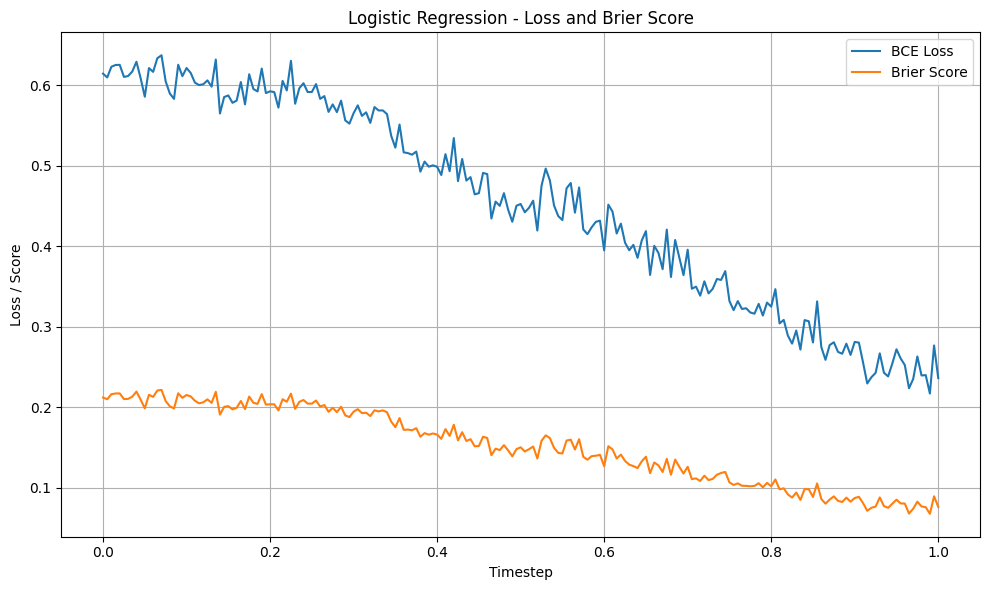

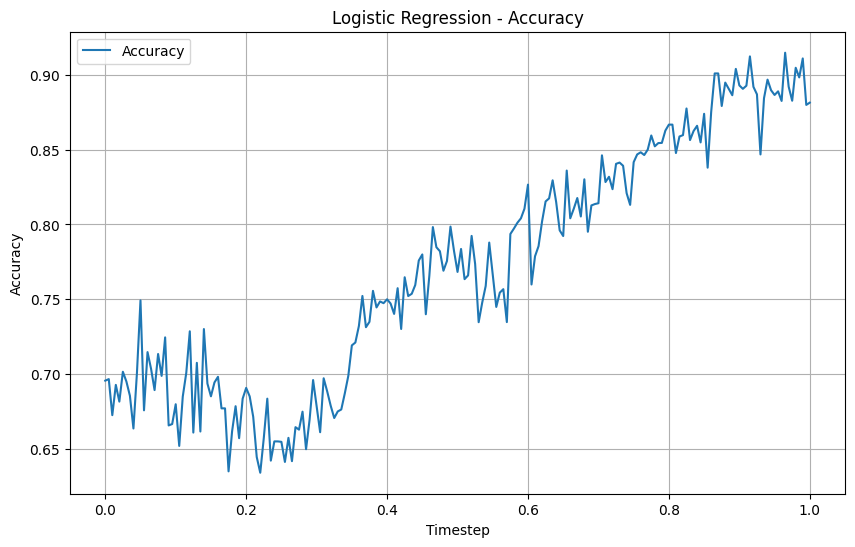

In [19]:
# # Test accuracy of model for each timestep on test data and plot
# accuracies = []
# timesteps = []
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")
process_data.plot_accuracy(models, test_data, "Logistic Regression")

In [22]:
model = models[0.99]
features = ["relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]
data_point = [0.5, -4, 1, 1, 1, 1, 1, 1]
model.predict_proba([data_point])

array([[0.77174282, 0.22825718]])

In [156]:
# Save the model
import pickle
filename = 'logistic_regression_model.pickle'
pickle.dump(models, open(filename, 'wb'))

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reload_ext autoreload
from models.utils import SHAP_analysis
# model = models[0.99]
# # Health Check:
# if hasattr(model.model, "coef_"):
#     feature_names = model.all_features if hasattr(model, "all_features") else None
#     coefs = model.model.coef_[0]  # shape (n_features,)
#     if feature_names is not None and len(feature_names) == len(coefs):
#         for name, coef in zip(feature_names, coefs):
#             print(f"{name}: {coef}")


SHAP_analysis(models, training_data, test_data, "logistic_regression", "shap_values/LR", num_threads = 1)
# x = np.array([[0.1, 0.9, 20, 1, 0, 1, 50, 20, 2, 2, 2]])
# model.predict_proba(x)


Processing 32 timesteps (skipping 169 already done).


PermutationExplainer explainer: 342it [00:36,  7.10it/s]                         


Saved logistic_regression_0.85.npz


PermutationExplainer explainer: 366it [00:39,  7.05it/s]


Saved logistic_regression_0.845.npz


PermutationExplainer explainer: 365it [00:43,  5.98it/s]                         



Saved logistic_regression_0.855.npz


PermutationExplainer explainer: 337it [00:41,  5.56it/s] [00:39<00:02,  5.03it/s]


Saved logistic_regression_0.86.npz


PermutationExplainer explainer: 354it [00:41,  6.46it/s]                         


Saved logistic_regression_0.865.npz


PermutationExplainer explainer: 354it [00:41,  6.41it/s]


Saved logistic_regression_0.87.npz


PermutationExplainer explainer: 343it [00:42,  5.92it/s] [00:44<00:00, 11.37it/s]
PermutationExplainer explainer: 365it [00:44,  6.09it/s]                         


Saved logistic_regression_0.88.npz
Saved logistic_regression_0.875.npz


PermutationExplainer explainer: 357it [00:40,  6.73it/s]                         


Saved logistic_regression_0.885.npz


PermutationExplainer explainer: 344it [00:40,  6.41it/s]                         


Saved logistic_regression_0.89.npz


PermutationExplainer explainer: 334it [00:39,  6.27it/s]                         


Saved logistic_regression_0.895.npz


PermutationExplainer explainer: 365it [00:43,  6.22it/s]                         


Saved logistic_regression_0.9.npz


PermutationExplainer explainer: 330it [00:42,  5.53it/s]                         


Saved logistic_regression_0.905.npz


PermutationExplainer explainer: 355it [00:45,  5.83it/s]                         


Saved logistic_regression_0.91.npz


PermutationExplainer explainer: 377it [00:41,  6.73it/s]                         


Saved logistic_regression_0.915.npz


PermutationExplainer explainer: 371it [00:46,  6.08it/s][00:13<00:31,  9.67it/s]
PermutationExplainer explainer:  23%|██▎       | 88/389 [00:13<00:33,  8.95it/s]

Saved logistic_regression_0.92.npz


PermutationExplainer explainer: 390it [00:48,  6.97it/s]                         


Saved logistic_regression_0.925.npz


PermutationExplainer explainer: 386it [00:44,  6.66it/s]                         
PermutationExplainer explainer:  24%|██▍       | 94/389 [00:10<00:17, 16.53it/s]

Saved logistic_regression_0.93.npz


PermutationExplainer explainer: 390it [00:56,  5.29it/s]                         


Saved logistic_regression_0.935.npz


PermutationExplainer explainer: 427it [01:06,  5.14it/s] [00:19<01:53,  2.56it/s]
PermutationExplainer explainer:  34%|███▍      | 147/435 [00:19<01:24,  3.40it/s]

Saved logistic_regression_0.94.npz


PermutationExplainer explainer: 436it [01:05,  5.31it/s]                         


Saved logistic_regression_0.945.npz


PermutationExplainer explainer: 415it [01:01,  6.19it/s]                         
PermutationExplainer explainer:  29%|██▉       | 122/414 [00:15<00:38,  7.59it/s]

Saved logistic_regression_0.95.npz


PermutationExplainer explainer: 415it [00:51,  6.45it/s]                         


Saved logistic_regression_0.955.npz


PermutationExplainer explainer: 469it [00:56,  6.67it/s] [00:19<00:21, 10.62it/s]


Saved logistic_regression_0.96.npz


PermutationExplainer explainer: 423it [00:44,  7.24it/s]                         


Saved logistic_regression_0.965.npz


PermutationExplainer explainer: 461it [01:03,  6.01it/s]                         


Saved logistic_regression_0.975.npz


PermutationExplainer explainer: 927it [02:03,  6.75it/s] [00:34<00:32,  3.67it/s]
PermutationExplainer explainer:  71%|███████   | 289/409 [00:34<00:31,  3.77it/s]

Saved logistic_regression_0.97.npz


PermutationExplainer explainer: 410it [00:50,  6.07it/s]                         


Saved logistic_regression_0.98.npz


PermutationExplainer explainer: 502it [01:00,  6.99it/s]                         
PermutationExplainer explainer:  84%|████████▍ | 386/460 [00:45<00:09,  8.05it/s]

Saved logistic_regression_0.985.npz


PermutationExplainer explainer: 461it [00:54,  6.78it/s]                         


Saved logistic_regression_0.99.npz


PermutationExplainer explainer: 492it [00:48,  8.28it/s]                         


Saved logistic_regression_0.995.npz


PermutationExplainer explainer: 591it [00:49,  9.91it/s]                         


Saved logistic_regression_1.0.npz


In [23]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "LR_phat_b")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

# For Debugging Purposes